<a href="https://colab.research.google.com/github/valeraboyko2002/test/blob/main/%D0%BB%D0%B8%D0%BD_%D0%B0%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0_%D0%BF%D1%80%D0%BE%D0%B4%D0%BE%D0%BB%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная алгебра, 2 часть: Операции с матрицами

## 1: Разложение матрицы по собственным значениям

процесс в линейной алгебре, при котором квадратная матрица раскладывается на набор собственных векторов и собственных значений

### Аффинное преобразование

Это любое преобразование, при котором сохраняется коллинеарность, параллельность, а также отношение расстояний между точками (например, середина линии остаётся серединой после преобразования). При этом не обязательно сохраняются расстояния и углы

Допустим у нас есть вектор $v$:

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
v = np.array([3,1])
v

array([3, 1])

Изобразим вектор $v$ используя функцию `plot_vectors()`

In [9]:
def plot_vectors(vectors, colors):
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

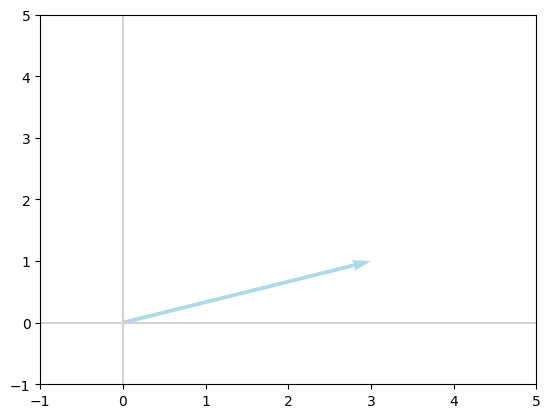

In [10]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

Применение матрицы к вектору (матрично-векторное умножение) позволяет линейно преобразовать вектор

применение единичной матрицы на вектор не преобразует его

In [11]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [12]:
Iv = I @ v
Iv

array([3, 1])

In [13]:
v == Iv

array([ True,  True])

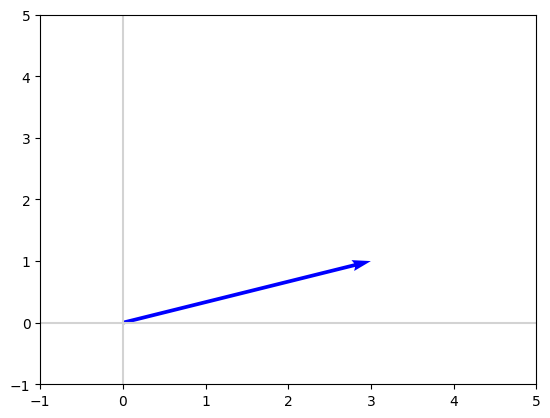

In [14]:
plot_vectors([Iv],['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

Представим матрицу (назовем ее $E$) которая разворачивает вектор на $x$-оси:

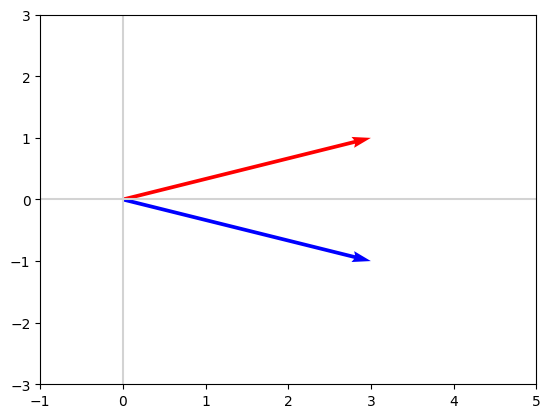

In [15]:
E = np.array([[1,0],[0,-1]])
Ev = E @ v
plot_vectors([v,Ev],['red','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-3,3)

или, эту матрицу, $F$, которая разворачивает на $y$-оси:

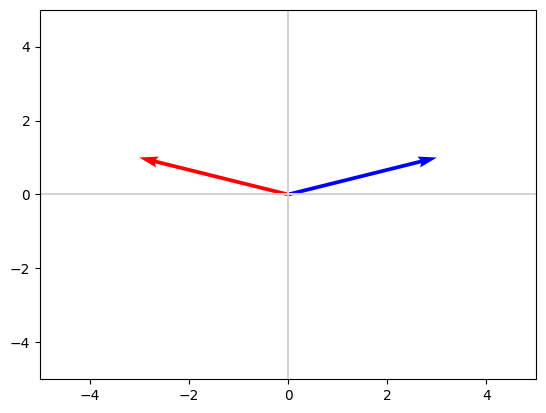

In [16]:
F = np.array([[-1,0],[0,1]])
Fv = F @ v
plot_vectors([v,Fv],['blue','red'])
plt.xlim(-5,5)
_ = plt.ylim(-5,5)

Применение отображающей матрицы является примером **аффинного преобразования**: изменения вектора, которое может изменить расстояния или углы между векторами, но сохраняет параллельность между ними

Помимо отражения матрицы относительно оси (рефлексия), другие распространенные аффинные преобразования включают:

Масштабирование (изменение длины векторов)

Сдвиг

Поворот


Матрица может применять несколько аффинных преобразований одновременно (например, отражение относительно оси и поворот на 45 градусов).

В качестве примера применим эту матрицу $A$ к вектору $v$:



In [17]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [18]:
Av = A @ v
Av

array([1, 4])

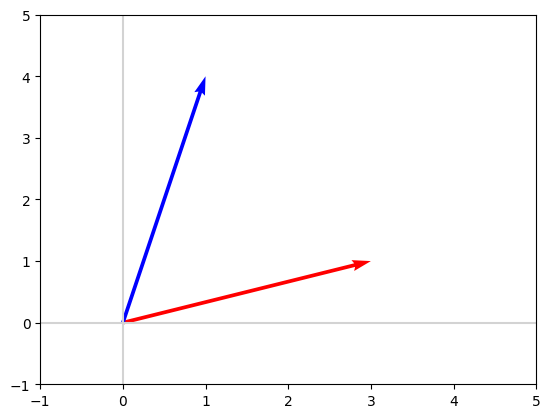

In [19]:
plot_vectors([v,Av],['red','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

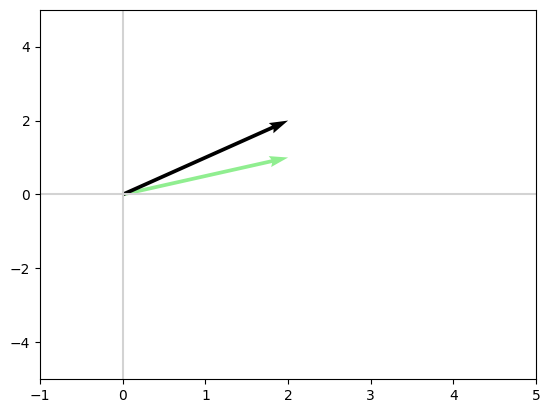

In [20]:
v2 = np.array([2,1])
plot_vectors([v2,A@v2],['lightgreen','black'])
plt.xlim(-1,5)
_ = plt.ylim(-5,5)

Можно объединить несколько векторов в одну матрицу (например, $V$), где каждый столбец представляет собой отдельный вектор. Затем любые линейные преобразования, которые применяются к $V$, будут независимо применены к каждому столбцу (вектору):



In [21]:
v

array([3, 1])

In [22]:
np.matrix(v).T

matrix([[3],
        [1]])

In [23]:
v3 = np.array([-3,-1])
v4 = np.array([-1,1])

V = np.concatenate((np.matrix(v).T,np.matrix(v2).T,
                    np.matrix(v3).T,np.matrix(v4).T),axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [24]:
IV = I @ V
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [25]:
AV = A @ V
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [26]:
V3 = V * 3
V3

matrix([[ 9,  6, -9, -3],
        [ 3,  3, -3,  3]])

In [32]:
# функция преобразующая колонки матрицы в 1D вектор:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [33]:
vectorfy(V,0)

array([3, 1])

In [34]:
vectorfy(V,0) == v

array([ True,  True])

In [35]:
vectorfy(V,1) == v2

array([ True,  True])

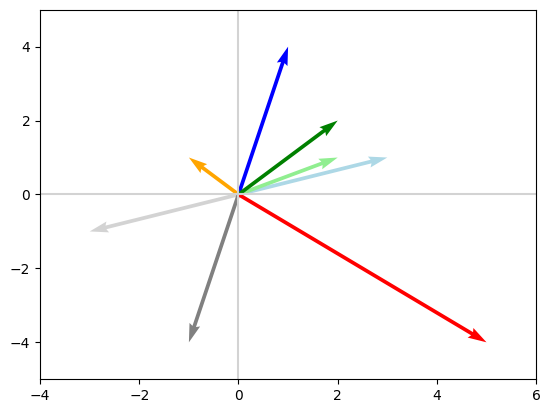

In [36]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

**Собственный вектор** — это особый вектор v, который при преобразовании с помощью некоторой матрицы (скажем, A) сохраняет своё направление. Другими словами, результат умножения Av имеет точно такое же направление, как и сам вектор v.

**Собственное значение** — это скаляр (традиционно обозначаемый как λ), который просто масштабирует собственный вектор v, так что выполняется следующее уравнение:

Av = λv

In [37]:
A

array([[-1,  4],
       [ 2, -2]])

Матрица содержит столько собственных векторов, сколько имеется столбцов в матрице А:

In [38]:
V # каждый столбец это отдельный собственный вектор

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

Собственные векторы и собственные значения могут быть вычислены алгебраическим методом ([QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), который был независимо разработан в 1950-х годах [Верой Кублановской](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) и Джоном Фрэнсисом), однако я воспользуюсь "укороченным путём" с помощью метода NumPy eig(), который возвращает кортеж из:

* вектора собственных значений
* матрицы собственных векторов



In [39]:
A

array([[-1,  4],
       [ 2, -2]])

In [40]:
n = np.array([[1,0,1],[1,2,0],[8,0,-1]])
n

array([[ 1,  0,  1],
       [ 1,  2,  0],
       [ 8,  0, -1]])

In [41]:
lambdas, V = np.linalg.eig(A)
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [42]:
lambdas

array([ 1.37228132, -4.37228132])

Проверим $Av = \lambda v$ для первого собственного вектора

In [43]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [44]:
lambduh = lambdas[0]
lambduh

np.float64(1.3722813232690143)

In [45]:
Av = A @ v
Av

array([1.18031462, 0.70000958])

In [46]:
lambduh * v

array([1.18031462, 0.70000958])

In [47]:
Λ = np.diag(lambdas)
A_reconstructed = V @ Λ @ np.linalg.inv(V)
A_reconstructed

array([[-1.,  4.],
       [ 2., -2.]])

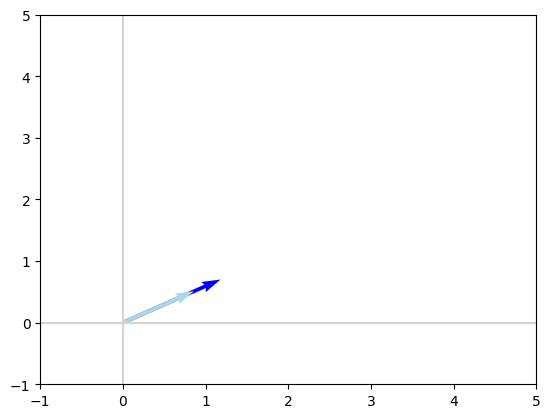

In [48]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In [49]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [50]:
lambda2 = lambdas[1]
lambda2

np.float64(-4.372281323269014)

In [51]:
Av2  = A @ v2
Av2

array([ 3.34281692, -2.81822977])

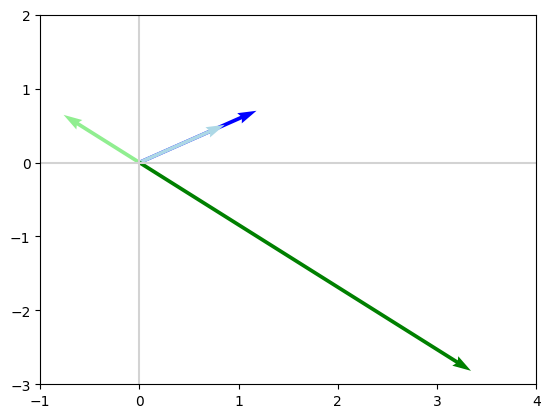

In [52]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
_ = plt.ylim(-3,2)

Pytorch eig()

In [53]:
A

array([[-1,  4],
       [ 2, -2]])

In [54]:
import torch

A_p = torch.tensor([[-1,4],[2,-2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [55]:
lambda_cplx, V_cplx = torch.linalg.eig(A_p)
print(lambda_cplx, '\n', V_cplx)

tensor([ 1.3723+0.j, -4.3723+0.j]) 
 tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])


In [56]:
V_p  = V_cplx.float()
V_p

/tmp/ipython-input-2279756199.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /pytorch/aten/src/ATen/native/Copy.cpp:309.)
  V_p  = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [57]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [58]:
lambda_p = lambda_cplx.float()
lambda_p

tensor([ 1.3723, -4.3723])

In [59]:
la_p  = lambda_p[0]
Av_p = torch.matmul(A_p, v_p)
Av_p

tensor([1.1803, 0.7000])

In [60]:
lambda_p * v_p

tensor([ 1.1803, -2.2303])

In [61]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [62]:
Av2_p = torch.matmul(A_p.float(),v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

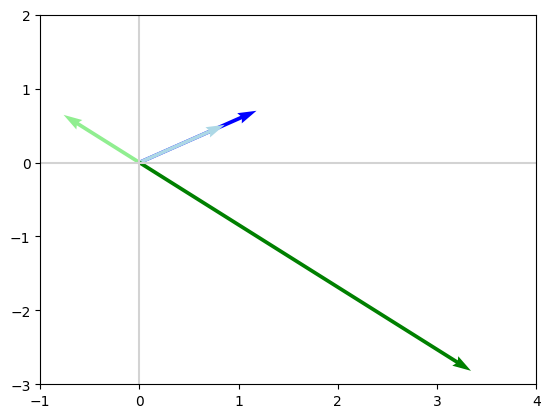

In [65]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Собственные векторы в >2 измерениях

Хотя построение графиков в многомерном пространстве становится сложнее, тем не менее, есть возможность находить и использовать собственные векторы с более чем двумя измерениями. Вот 3D-пример (три измерения обрабатываются в трех строках).:

In [66]:
X = np.array([[25,2,9],[5,26,-5],[3,7,-1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [67]:
lambda_X, V_X = np.linalg.eig(X)

In [68]:
V_X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [69]:
lambda_X

array([29.67623202, 20.62117365, -0.29740567])

In [70]:
v_X = V_X[0]
np.dot(X,v_X)

array([-22.17416093, -18.7527577 ,  -6.34441204])

In [73]:
lambda_X * v_X

array([-21.12227645, -13.40772428,   0.10177364])

### 2x2 Matrix Determinants

In [76]:
x = np.array([[4,2],[-5,-3]])
print(x)
np.linalg.det(x)

[[ 4  2]
 [-5 -3]]


np.float64(-2.0000000000000013)

In [77]:
n = np.array([[-4,1],[-8,2]])
print(n)
np.linalg.det(n)

[[-4  1]
 [-8  2]]


np.float64(0.0)

In [81]:
a, b = x[0]
c, d = x[1]
a * d - b * c

np.int64(-2)

### Обобщающие детерминанты

In [85]:
x = np.array([[1,2,3],[4,5,6],[65,34,23]])
np.linalg.det(x)

np.float64(-59.999999999999986)

In [89]:
a,b,c = x[0]
d,e,f = x[1]
g,h,i = x[2]

a*(e*i - f*h) - b*(d*i - f*g) + c*(d*h - e*g)

np.int64(-60)

### Определяющие факторы и собственные значения (факторный анализ)

In [97]:
print(lambdas)
print('\n',V)

[36.23923494 -7.46113992  0.22190498]

 [[-0.09435269 -0.23526523  0.2650956 ]
 [-0.19941535 -0.35930892 -0.83260173]
 [-0.97536203  0.90307661  0.4863113 ]]


In [92]:
lambdas, V = np.linalg.eig(x)
np.prod(lambdas)

np.float64(-59.9999999999997)